# Writing Functions in Python

## Chapter 4 - More on Decorators

### Real World Examples

A timer decorator is often used with custom functions to figure out where computational bottlenecks are. All decorators have a similar docstring, in that they all take and return a single function.
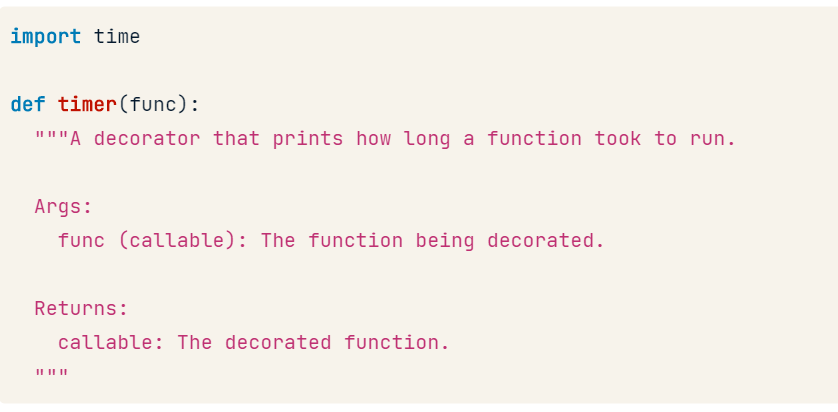

The timer decorator below starts by defining the wrapper function, the function that the decorator will return. This takes wrapper function takes any number of positional and keyword arguments so that it can be used to decorate any function. The first thing the function will do is record the time it was called.

Next the wrapper gets the results of calling the function but that is not returned yet. Instead, the time needs to be checked again and the length of time it took to run the called function needs to be calculated and a print statement will show how long the called function took to run. 

In [ ]:
import time

def timer(func):
    '''A decorator that prints how long a function took to run'''
    def wrapper(*args, **kwargs):
        #When wrapper is called, get the current time
        t_start = time.time()
        #Call the decorated function and store the results
        results = func(*args, **kwargs)
        t_total = time.time() - t_start
        print('{} took {}s'.format(func.__name__, t_total))
        return results
    return wrapper

@timer
def sleep_n_seconds(n):
    time.sleep(n)
    
sleep_n_seconds(5)

Menoizing is the process of storing the results of a function so that the next time the function is called with the same arguments the answer can be looked up. Start by creating a dictionary that will map arguments to results and then create the wrapper. Then check check the cache dictionary to see if the arguments and keyword arguments are already in the dictionary. If not, then these arguments and keyword arguments are added to the cache dictionary with the result of the function assigned as their values. The next step is to return the dictionary values for the associated arguments and keyword arguments.

When the slow_function is called the second time, the actual function is not run again, so the result doesn't print Sleeping, it only displays the stored result. 

In [ ]:
def menoize(func):
    '''Stores the results of the decorated function for fast lookup'''
    
    #Store the results in a dictionary that maps arguments to results
    cache = {}
    #Define the wrapper function 
    def wrapper(*args, **kwargs):
        #if these arguments haven't been called before:
        if args not in cache:
            #Call func() and store the result
            cache[args] = func(*args, **kwargs)
        return cache[args]
    return wrapper

@menoize
def slow_function(a, b):
    print('Sleeping...')
    time.sleep(5)
    return a + b

slow_function(5,3)

In [ ]:
slow_function(5,3)

#### When to Use Decorators

When there is a need to add some common bit of code to multiple functions. For example, if there is a need to add a timer function to multiple functions, it could be added to each function, but that violates the rule of don't repeat yourseld (DRY).

### Exercise 1

#### Print the return type
You are debugging a package that you've been working on with your friends. Something weird is happening with the data being returned from one of your functions, but you're not even sure which function is causing the trouble. You know that sometimes bugs can sneak into your code when you are expecting a function to return one thing, and it returns something different. For instance, if you expect a function to return a numpy array, but it returns a list, you can get unexpected behavior. To ensure this is not what is causing the trouble, you decide to write a decorator, print_return_type(), that will print out the type of the variable that gets returned from every call of any function it is decorating.

__Instructions:__
* Create a nested function, wrapper(), that will become the new decorated function.
* Call the function being decorated.
* Return the new decorated function.

In [ ]:
def print_return_type(func):
  # Define wrapper(), the decorated function
  def wrapper(*args, **kwargs):
    # Call the function being decorated
    result = func(*args, **kwargs)
    print('{}() returned type {}'.format(
      func.__name__, type(result)
    ))
    return result
  # Return the decorated function
  return wrapper
  
@print_return_type
def foo(value):
  return value
  
print(foo(42))
print(foo([1, 2, 3]))
print(foo({'a': 42}))

#### Counter
You're working on a new web app, and you are curious about how many times each of the functions in it gets called. So you decide to write a decorator that adds a counter to each function that you decorate. You could use this information in the future to determine whether there are sections of code that you could remove because they are no longer being used by the app.

__Instructions:__
* Call the function being decorated and return the result.
* Return the new decorated function.
* Decorate foo() with the counter() decorator.

In [ ]:
def counter(func):
  def wrapper(*args, **kwargs):
    wrapper.count += 1
    # Call the function being decorated and return the result
    return func(*args, **kwargs)
  wrapper.count = 0
  # Return the new decorated function
  return wrapper

# Decorate foo() with the counter() decorator
@counter
def foo():
  print('calling foo()')
  
foo()
foo()

print('foo() was called {} times.'.format(foo.count))

### Decorators and Metadata

One of the problems with decorators is that they obscure the decorated function's metadata. Analyzing the metadata of sleep_nsec() shows the docstring attribute displays the text of the docstring and other metadata like the function's name and default arguments are available. But when the sleep_nsec() function is decorated with the timer decorator and the sleep_nsec() docstring is called again, it returns the name of the function as wrapper. This is because when the sleep_nsec() function is decorated with timer(), it is actually overwriting the sleep_nsec() function with the timer(). This means that when the docstrings for the decorated function is called, it's actually calling the docstrings for the decorator function. 

Fortunately, Python provides an easy way to fix this. The wraps function from the functools module is a decorator used when defining a decorator. When used to decorate the wrapper function that is being written, it will modify custom wrapper metadata to look like the metadata of the function being decorated. After modifying the timer() function wrapper with @wraps and then applying the updated timer() function to sleep_nsecs() and call the sleep_nsecs() docstrings, we get the actual docstrins of sleep_nsecs(). Same with the names and default metadata.

In [ ]:
def sleep_nsec(n=10):
    '''Pause processing for n seconds
    
    Args:
    n (int): number of seconds to pause'''
    
    time.sleep(n)
    
print(sleep_nsec.__doc__)
print(sleep_nsec.__name__)
print(sleep_nsec.__defaults__)

@timer
def sleep_nsec(n=10):
    '''Pause processing for n seconds
    
    Args:
    n (int): number of seconds to pause'''
    
    time.sleep(n)

print(sleep_nsec.__doc__)
print(sleep_nsec.__name__)
print(sleep_nsec.__defaults__) 

from functools import wraps

#Update Timer function with @wraps to retain wrapped function's metadata
def timer(func):
    '''A decorator that prints how long a function took to run'''
    @wraps(func)
    def wrapper(*args, **kwargs):
        #When wrapper is called, get the current time
        t_start = time.time()
        #Call the decorated function and store the results
        results = func(*args, **kwargs)
        t_total = time.time() - t_start
        print('{} took {}s'.format(func.__name__, t_total))
        return results
    return wrapper

#Rewrap sleep_nsecs with the updated timer()
@timer
def sleep_nsec(n=10):
    '''Pause processing for n seconds
    
    Args:
    n (int): number of seconds to pause'''
    
    time.sleep(n)
    
print(sleep_nsec.__doc__)
print(sleep_nsec.__name__)
print(sleep_nsec.__defaults__) 

## Can't figure out why the __defaults__ doesn't work when wrapped. Will need to research. It shows as working properly
## in the DataCamp video lesson, but there have been a few examples that didn't work as show in the slides.

#### Access to the Original Function

One other benefit of using @wraps for functions that will be used as decorators is that the double underscore wrapped double undscore attribute will display the original wrapped function.

In [ ]:
sleep_nsec.__wrapped__

### Exercise 2

#### Preserving docstrings when decorating functions
Your friend has come to you with a problem. They've written some nifty decorators and added them to the functions in the open-source library they've been working on. However, they were running some tests and discovered that all of the docstrings have mysteriously disappeared from their decorated functions. Show your friend how to preserve docstrings and other metadata when writing decorators.

__Instructions:__
* Decorate print_sum() with the add_hello() decorator to replicate the issue that your friend saw - that the docstring disappears.
* To show your friend that they are printing the wrapper() function's docstring, not the print_sum() docstring, add the following docstring to wrapper():
> "Print 'hello' and then call the decorated function."<br>
* Import a function that will allow you to add the metadata from print_sum() to the decorated version of print_sum().
* Finally, decorate wrapper() so that the metadata from func() is preserved in the new decorated function.

In [ ]:
def add_hello(func):
    def wrapper(*args, **kwargs):
        print('Hello')
        return func(*args, **kwargs)
    return wrapper

# Decorate print_sum() with the add_hello() decorator
@add_hello
def print_sum(a, b):
  """Adds two numbers and prints the sum"""
  print(a + b)
  
print_sum(10, 20)
print(print_sum.__doc__)

In [ ]:
def add_hello(func):
    def wrapper(*args, **kwargs):
        """Print 'hello' and then call the decorated function"""
        print('Hello')
        return func(*args, **kwargs)
    return wrapper

# Decorate print_sum() with the add_hello() decorator
@add_hello
def print_sum(a, b):
  """Adds two numbers and prints the sum"""
  print(a + b)
  
print_sum(10, 20)
print(print_sum.__doc__)

In [ ]:
from functools import wraps

def add_hello(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        """Print 'hello' and then call the decorated function"""
        print('Hello')
        return func(*args, **kwargs)
    return wrapper

# Decorate print_sum() with the add_hello() decorator
@add_hello
def print_sum(a, b):
  """Adds two numbers and prints the sum"""
  print(a + b)
  
print_sum(10, 20)
print(print_sum.__doc__)

#### Measuring decorator overhead
Your boss wrote a decorator called check_everything() that they think is amazing, and they are insisting you use it on your function. However, you've noticed that when you use it to decorate your functions, it makes them run much slower. You need to convince your boss that the decorator is adding too much processing time to your function. To do this, you are going to measure how long the decorated function takes to run and compare it to how long the undecorated function would have taken to run. This is the decorator in question:

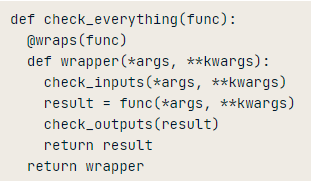

__Instructions:__
* Call the original function instead of the decorated version by using an attribute of the function that the wraps() statement in your boss's decorator added to the decorated

In [ ]:
def check_everything(func):
  @wraps(func)
  def wrapper(*args, **kwargs):
    check_inputs(*args, **kwargs)
    result = func(*args, **kwargs)
    check_outputs(result)
    return result
  return wrapper


@check_everything
def duplicate(my_list):
  """Return a new list that repeats the input twice"""
  return my_list + my_list

t_start = time.time()
duplicated_list = duplicate(list(range(50)))
t_end = time.time()
decorated_time = t_end - t_start

t_start = time.time()
# Call the original function instead of the decorated one
duplicated_list = duplicate.__wrapped__(list(range(50)))
t_end = time.time()
undecorated_time = t_end - t_start

print('Decorated time: {:.5f}s'.format(decorated_time))
print('Undecorated time: {:.5f}s'.format(undecorated_time))

# Can't run this exercise until I figure out how to recreate the check_inputs() custom function defined in the wrapper

### Decorators That Take Arguments

Sometimes arguments for decorators is helpful. To do this, another level of function nesting is needed. Consider this simple decorator. The run_three_times() decorator function will run the decorated function three times. When applied to the print_sum() function with the arguments 3, 5, it will print 8 three times.

In [ ]:
def run_three_times(func):
    def wrapper(*args, **kwargs):
        for i in range(3):
            func(*args, **kwargs)
    return wrapper

@run_three_times
def print_sum(a, b):
    print(a+b)

print_sum(3,5)

#### run_n_times() Decorator

In order the modify the run_three_times() decorator to run n number of times, the decorator would need to accept arguments. But a decorator is only supposed to take the argument of the function it is decorating. To make run_n_times work, it has to start as a function that returns a decorator rather a function that is a decorator. First decorator function that accepts func as an argument is created, this will act as the actual decorator. The new decorator then created the nested wrapper() function. Since the wrapper() function in within the run_n_times() function, it has access to the n parameter. This can be used to define how many times the decorator function is called. And finally, the wrapper function is returned. The run_n_times() then returns the decorator() function that can be used as a decorator.

In [ ]:
def run_n_times(n):
    """Define and run a decorator"""
    def decorator(func):
        def wrapper(*args, **kwargs):
            for i in range(n):
                func(*args, **kwargs)
        return wrapper
    return decorator

@run_n_times(5)
def print_sum(a, b):
    print(a + 5)

print_sum(3,5)

@run_n_times(7)
def print_hello():
    print('Hello!')

print_hello()

### Exercise 3

#### Run_n_times()
In the video exercise, I showed you an example of a decorator that takes an argument: run_n_times(). The code for that decorator is repeated below to remind you how it works.
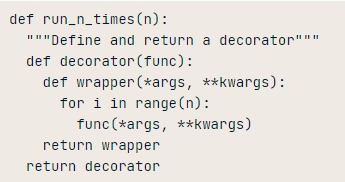
Practice different ways of applying the decorator to the function print_sum(). Then I'll show you a funny prank you can play on your co-workers.

__Instructions:__
* Add the run_n_times() decorator to print_sum() using decorator syntax so that print_sum() runs 10 times.
* Use run_n_times() to create a decorator run_five_times() that will run any function five times.
* Here's the prank: use run_n_times() to modify the built-in print() function so that it always prints 20 times!

In [ ]:
# Make print_sum() run 10 times with the run_n_times() decorator
@run_n_times(10)
def print_sum(a, b):
  print(a + b)
  
print_sum(15, 20)

# Use run_n_times() to create the run_five_times() decorator
run_five_times = run_n_times(5)

@run_five_times
def print_sum(a, b):
  print(a + b)
  
print_sum(4, 100)

# Modify the print() function to always run 20 times
print = run_n_times(20)(print)

print('What is happening?!?!')

#### HTML Generator
You are writing a script that generates HTML for a webpage on the fly. So far, you have written two decorators that will add bold or italics tags to any function that returns a string. You notice, however, that these two decorators look very similar. Instead of writing a bunch of other similar looking decorators, you want to create one decorator, html(), that can take any pair of opening and closing tags.
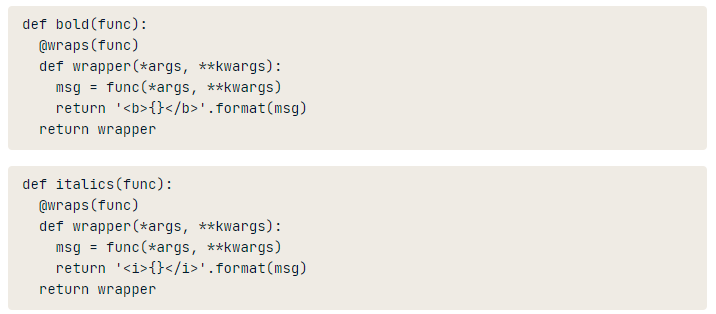

__Instructions:__
* Return the decorator and the decorated function from the correct places in the new html() decorator.
* Use the html() decorator to wrap the return value of hello() in <b> and </b> (the HTML tags that mean "bold").
* Use html() to wrap the return value of goodbye() in <i> and </i> (the HTML tags that mean "italics").
* Use html() to wrap hello_goodbye() in a DIV, which is done by adding div and backslash div tags around a string.

In [ ]:
def html(open_tag, close_tag):
  def decorator(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
      msg = func(*args, **kwargs)
      return '{}{}{}'.format(open_tag, msg, close_tag)
    # Return the decorated function
    return wrapper
  # Return the decorator
  return decorator

# Make hello() return bolded text
@html('<b>', '</b>')
def hello(name):
  return 'Hello {}!'.format(name)
  
print(hello('Alice'))

# Make hello() return bolded text
@html('<i>', '</i>')
def hello(name):
  return 'Hello {}!'.format(name)
  
print(hello('Alice'))

# Make hello() return bolded text
@html('<div>', '</div>')
def hello(name):
  return 'Hello {}!'.format(name)
  
print(hello('Alice'))

### Timeout - A Real World Example

When there are functions that seem to run longer than expected or just hang and never return the expected output, it would convenient to have timeout decorator that would raise an error if the function ran longer than expected. To create the timeout decorator, it would be helpful to understand how certain functions from the Python signal module work.

The raise_timeout() function raises a timeout error when it is called. The signal() function tells Python that when the signal, whose number is signalnum, occurs, call the handler function which is, in this case, the raise_timeout() function. The alarm function accepts a number to represent the number of seconds in the future to send the alarm. Passing a zero to the alarm() function cancels the alarm. 
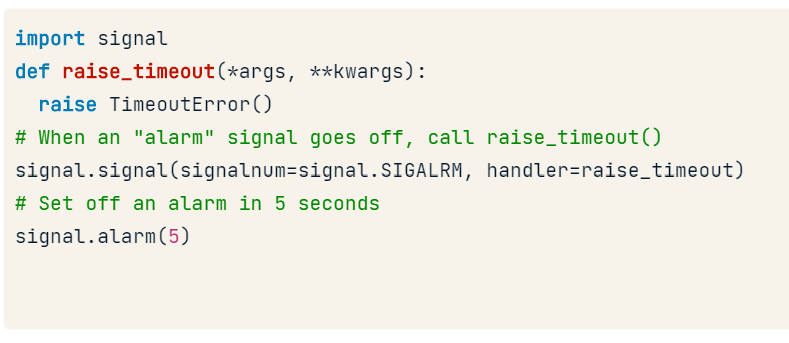

In the function below, timeout_in_5sec(), the wrapper subfunction is created to set off a single in 5 seconds and then a try: block is created to try the function this decorator will decorate so that in a finally: block the alarm can be cancelled. This ensures the alarm either rings or it gets cancelled. When the alarm rings, Python will call the raise_timeout() function created above.
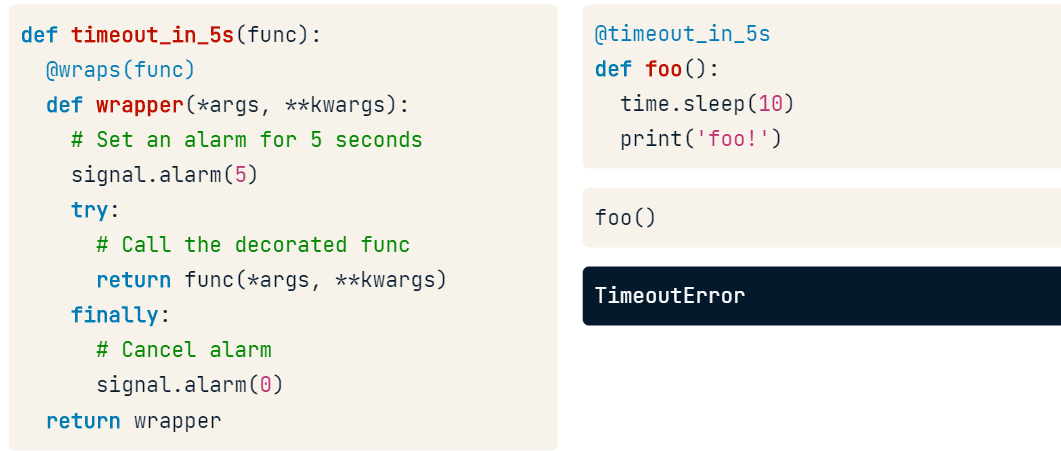

To generalize the timeout function to be a timeout_in_nsec(), a decorator factory approach is used.
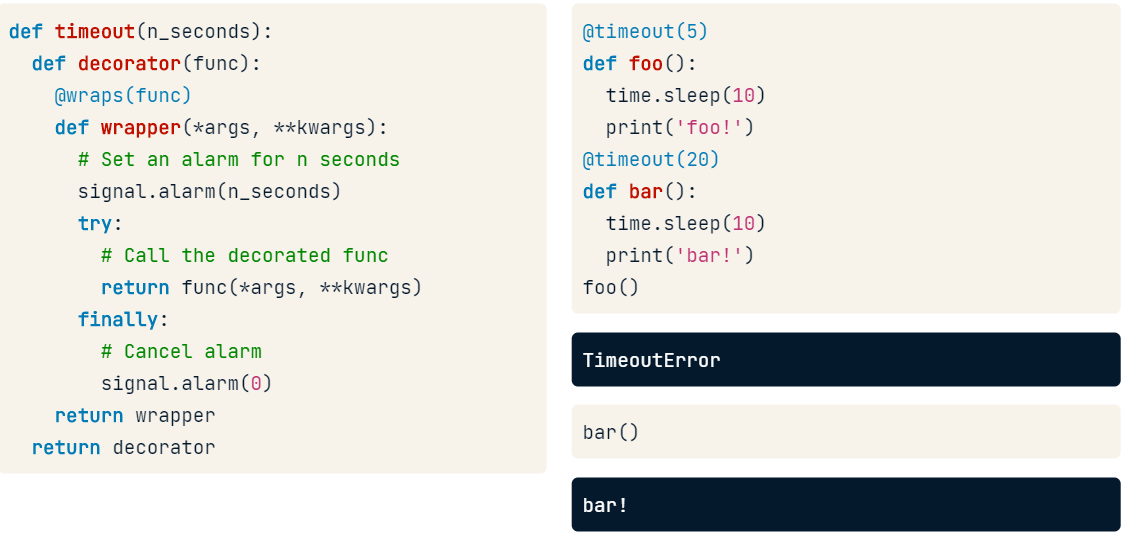

### Exercise 4

#### Tag your functions
Tagging something means that you have given that thing one or more strings that act as labels. For instance, we often tag emails or photos so that we can search for them later. You've decided to write a decorator that will let you tag your functions with an arbitrary list of tags. You could use these tags for many things:

Adding information about who has worked on the function, so a user can look up who to ask if they run into trouble using it.
Labeling functions as "experimental" so that users know that the inputs and outputs might change in the future.
Marking any functions that you plan to remove in a future version of the code.
Etc.

__Instructions:__
* Define a new decorator, named decorator(), to return.
* Ensure the decorated function keeps its metadata.
* Call the function being decorated and return the result.
* Return the new decorator.

In [21]:
def tag(*tags):
  # Define a new decorator, named "decorator", to return
  def decorator(func):
    # Ensure the decorated function keeps its metadata
    @wraps(func)
    def wrapper(*args, **kwargs):
      # Call the function being decorated and return the result
      return func(*args, **kwarg)
    wrapper.tags = tags
    return wrapper
  # Return the new decorator
  return decorator

@tag('test', 'this is a tag')
def foo():
  pass

print(foo.tags)

('test', 'this is a tag')


#### Check the return type
Python's flexibility around data types is usually cited as one of the benefits of the language. It can occasionally cause problems though if incorrect data types go unnoticed. You've decided that in order to make sure your code is doing exactly what you want it to do, you will explicitly check the return types of all of your functions and make sure they are what you expect them to be. To do that, you are going to create a decorator that checks that the return type of the decorated function is correct.

Note: assert(condition) is a function that you can use to test whether something is true. If condition is True, this function doesn't do anything. If condition is False, this function raises an error. The type of error that it raises is called an AssertionError.

__Instructions:__
* Start by completing the returns_dict() decorator so that it raises an AssertionError if the return type of the decorated function is not a dictionary.
* Now complete the returns() decorator, which takes the expected return type as an argument.

In [25]:
def tag(*tags):
  # Define a new decorator, named "decorator", to return
  def decorator(func):
    # Ensure the decorated function keeps its metadata
    @wraps(func)
    def wrapper(*args, **kwargs):
      # Call the function being decorated and return the result
      return func(*args, **kwarg)
    wrapper.tags = tags
    return wrapper
  # Return the new decorator
  return decorator

@tag('test', 'this is a tag')
def foo():
  pass

print(foo.tags)

('test', 'this is a tag')


In [26]:
def returns(return_type):
  # Complete the returns() decorator
  def decorator(func):
    def wrapper(*args, **kwargs):
      result = func(*args, **kwargs)
      assert(type(result) == return_type)
      return result
    return wrapper
  return decorator
  
@returns(dict)
def foo(value):
  return value

try:
  print(foo([1,2,3]))
except AssertionError:
  print('foo() did not return a dict!')

foo() did not return a dict!
